In [1]:
import pandas as pd
from typing import List
import glob
import pathlib
import re
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

from IPython.core.debugger import set_trace

%matplotlib inline
%load_ext autoreload
%autoreload 2

#matplotlib.use('TkAgg')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


MARKERS = ['v','X','>', 'o','s','p', 'P', '*', 'D', 'd', '<', 'H', 'h', '3', '1', '2']

# get latex files
latex_files = []
val_latex_files = []
folders = [33, 66]
for folder in folders:
    latex_files.extend(glob.glob(f'/Users/kimathikaai/scratch/saved/domainbed_results/{folder}/*.tex', recursive=True))
    val_latex_files.extend(glob.glob(f'/Users/kimathikaai/scratch/saved/domainbed_results/{folder}/*.tex-val', recursive=True))

    
print("Number of latex files: ", len(latex_files))
print("Number of validation latex files: ", len(val_latex_files))
assert len(latex_files) == len(folders) * 6 * 6
assert len(val_latex_files) == len(folders) * 6 * 6

# convert latex documents to a pandas dataframe
from results import scrape_latex
data = []
# scrape each latex file
for file in latex_files:
    #print('[info] processing: ', file)
    data.extend(scrape_latex(file))

# convert to pandas data frame
df = pd.DataFrame.from_dict(data)

# convert latex documents to a pandas dataframe
data = []
# scrape each latex file
for file in val_latex_files:
    #print('[info] processing: ', file)
    data.extend(scrape_latex(file))

# convert to pandas data frame
df_val = pd.DataFrame.from_dict(data)

Number of latex files:  72
Number of validation latex files:  72


In [2]:
len(df.loc[df['algorithm'].isin(['POXL'])])

216

In [3]:
data = df.loc[df['algorithm'].isin(['POXL'])]
df.loc[df['algorithm'].isin(['POXL'])]

,dataset,overlap,algorithm,selection_metric,evaluation_metric,selection_value,evaluation_value,selection_std,evaluation_std,baseline
33,VLCS,33,POXL,nacc,oacc,None,51.3,None,1.8,0
34,PACS,33,POXL,nacc,oacc,None,86.1,None,0.6,0
35,OfficeHome,33,POXL,nacc,oacc,None,57.3,None,1.0,0
94,VLCS,33,POXL,acc,vacc,None,49.9,None,0.8,0
95,PACS,33,POXL,acc,vacc,None,61.2,None,0.3,0
96,OfficeHome,33,POXL,acc,vacc,None,50.1,None,0.1,0
155,VLCS,33,POXL,acc,nacc,None,44.2,None,1.5,0
156,PACS,33,POXL,acc,nacc,None,35.5,None,0.3,0
157,OfficeHome,33,POXL,acc,nacc,None,40.6,None,0.2,0
216,VLCS,33,POXL,nacc,macc,None,49.3,None,0.9,0


In [4]:
len(data.loc[data['overlap'].isin(['66'])])

108

# Ablations
- Imposing fairnes (POXL) increases (nacc,nacc) and (acc,acc) than without (POXL-F) for (PACS, 33, 66)
- (POXL+B) is better than (POXL) for lower overlap (PACS, 33) but not for higher overlap
    - More difficult to impose fairness with less overlapping data
- Including alpha+beta is benefical for (acc, acc, PACS, 33, 66) (POXL-F-A vs POXL-F+B)
    - (nacc, nacc, PACS, 66) alpha+beta is more beneficial
    - (nacc, nacc, PACS, 33) alpha+beta is less beneficial

In [5]:
data = df.loc[(df['evaluation_metric'].isin(['nacc', 'macc']))&(df['selection_metric'].isin(['macc','nacc']))&(df['dataset'].isin(['PACS', 'OfficeHome', 'VLCS']))&(df['overlap'].isin(['33', '66']))][df['algorithm'].str.contains('POXL')].sort_values(by='algorithm', ascending=True).reset_index(drop=True)
pd.pivot_table(data=data, values='evaluation_value', index=['selection_metric', 'evaluation_metric','algorithm'], columns=['dataset', 'overlap'], aggfunc=np.mean)

/var/folders/kr/gtghwjcs55q1lrp82b0qv62h0000gn/T/ipykernel_84045/366286976.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df.loc[(df['evaluation_metric'].isin(['nacc', 'macc']))&(df['selection_metric'].isin(['macc','nacc']))&(df['dataset'].isin(['PACS', 'OfficeHome', 'VLCS']))&(df['overlap'].isin(['33', '66']))][df['algorithm'].str.contains('POXL')].sort_values(by='algorithm', ascending=True).reset_index(drop=True)


dataset                                      OfficeHome        PACS        \
overlap                                              33    66    33    66   
selection_metric evaluation_metric algorithm                                
macc             macc              POXL            47.5  53.9  50.2  58.0   
                                   POXL\ABF        47.6  54.3  48.6  58.9   
                                   POXL\B          47.9  53.7  49.0  59.9   
                                   POXL\BF         47.6  55.3  48.9  58.3   
                                   POXL\F          47.3  54.7  49.0  59.1   
                 nacc              POXL            40.3  40.6  35.3  11.6   
                                   POXL\ABF        40.9  39.3  33.7  13.1   
                                   POXL\B          40.9  39.8  34.2  14.9   
                                   POXL\BF         40.5  40.3  34.2  13.0   
                                   POXL\F          40.2  39.9  34.1  14.8   
nacc             macc              POXL            46.9  52.6  49.8  57.8   
                                   POXL\ABF        47.9  53.5  49.1  59.0   
                                   POXL\B          47.4  52.1  49.1  57.3   
                                   POXL\BF         47.8  55.3  47.4  59.4   
                                   POXL\F          47.5  53.9  49.4  57.4   
                 nacc              POXL            40.3  40.6  35.3  19.1   
                                   POXL\ABF        41.0  39.1  35.4  17.3   
                                   POXL\B          40.9  41.3  35.2  20.4   
                                   POXL\BF         41.0  41.7  33.2  15.4   
                                   POXL\F          40.6  40.8  35.3  17.5   

dataset                                       VLCS        
overlap                                         33    66  
selection_metric evaluation_metric algorithm              
macc             macc              POXL       51.6  52.5  
                                   POXL\ABF   51.3  51.7  
                                   POXL\B     51.2  51.3  
                                   POXL\BF    49.8  50.6  
                                   POXL\F     48.7  52.0  
                 nacc              POXL       47.9  42.2  
                                   POXL\ABF   47.1  34.0  
                                   POXL\B     47.3  40.1  
                                   POXL\BF    45.9  33.4  
                                   POXL\F     45.1  34.9  
nacc             macc              POXL       49.3  42.1  
                                   POXL\ABF   49.1  45.3  
                                   POXL\B     50.1  31.3  
                                   POXL\BF    49.6  44.7  
                                   POXL\F     49.5  45.8  
                 nacc              POXL       48.0  72.1  
                                   POXL\ABF   46.6  51.3  
                                   POXL\B     48.1  71.5  
                                   POXL\BF    50.0  44.0  
                                   POXL\F     48.5  51.7

In [6]:
data = df.loc[(df['evaluation_metric'].isin(['nacc']))&(df['selection_metric'].isin(['nacc']))&(df['dataset'].isin(['PACS', 'OfficeHome', 'VLCS']))&(df['overlap'].isin(['33', '66']))][df['algorithm'].str.contains('POXL')].sort_values(by='algorithm', ascending=True).reset_index(drop=True)
pd.pivot_table(data=data, values=['evaluation_value', 'evaluation_std'], index=['selection_metric', 'evaluation_metric','algorithm'], columns=['overlap', 'dataset'], aggfunc=np.mean)

/var/folders/kr/gtghwjcs55q1lrp82b0qv62h0000gn/T/ipykernel_84045/3059677242.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df.loc[(df['evaluation_metric'].isin(['nacc']))&(df['selection_metric'].isin(['nacc']))&(df['dataset'].isin(['PACS', 'OfficeHome', 'VLCS']))&(df['overlap'].isin(['33', '66']))][df['algorithm'].str.contains('POXL')].sort_values(by='algorithm', ascending=True).reset_index(drop=True)


evaluation_std            \
overlap                                                  33             
dataset                                          OfficeHome PACS VLCS   
selection_metric evaluation_metric algorithm                            
nacc             nacc              POXL                 0.3  1.2  0.4   
                                   POXL\ABF             0.4  1.2  1.0   
                                   POXL\B               0.4  0.3  0.4   
                                   POXL\BF              0.5  0.5  0.2   
                                   POXL\F               0.6  0.5  1.0   

                                                                   \
overlap                                              66             
dataset                                      OfficeHome PACS VLCS   
selection_metric evaluation_metric algorithm                        
nacc             nacc              POXL             0.4  0.6  3.5   
                                   POXL\ABF         0.5  1.3  2.8   
                                   POXL\B           0.6  2.5  4.5   
                                   POXL\BF          0.7  0.6  2.3   
                                   POXL\F           0.6  1.4  6.0   

                                             evaluation_value              \
overlap                                                    33               
dataset                                            OfficeHome  PACS  VLCS   
selection_metric evaluation_metric algorithm                                
nacc             nacc              POXL                  40.3  35.3  48.0   
                                   POXL\ABF              41.0  35.4  46.6   
                                   POXL\B                40.9  35.2  48.1   
                                   POXL\BF               41.0  33.2  50.0   
                                   POXL\F                40.6  35.3  48.5   

                                                                     
overlap                                              66              
dataset                                      OfficeHome  PACS  VLCS  
selection_metric evaluation_metric algorithm                         
nacc             nacc              POXL            40.6  19.1  72.1  
                                   POXL\ABF        39.1  17.3  51.3  
                                   POXL\B          41.3  20.4  71.5  
                                   POXL\BF         41.7  15.4  44.0  
                                   POXL\F          40.8  17.5  51.7

# Relationships Between Metrics
- Determine what `selection_metric` is a good indicator for a specific `evaluation_metric`

In [7]:
df.loc[(df['selection_metric'].isin(['nacc', 'acc'])) &(df['evaluation_metric'].isin(['nacc','acc']))
#].groupby(['dataset', 'overlap', 'selection_metric', 'evaluation_metric']).mean(numeric_only=True)
].groupby(['dataset','selection_metric', 'evaluation_metric']).mean(numeric_only=True)

evaluation_value  \
dataset    selection_metric evaluation_metric                     
OfficeHome acc              acc                       50.137838   
                            nacc                      39.459459   
           nacc             acc                       49.805405   
                            nacc                      39.705405   
PACS       acc              acc                       50.302273   
                            nacc                      23.693182   
           nacc             acc                       50.243182   
                            nacc                      25.843182   
VLCS       acc              acc                       47.120000   
                            nacc                      40.525000   
           nacc             acc                       44.485000   
                            nacc                      51.580000   

                                               evaluation_std  baseline  
dataset    selection_metric evaluation_metric                            
OfficeHome acc              acc                      0.370270  0.378378  
                            nacc                     0.451351  0.378378  
           nacc             acc                      0.383784  0.378378  
                            nacc                     0.427027  0.378378  
PACS       acc              acc                      0.545455  0.318182  
                            nacc                     0.845455  0.318182  
           nacc             acc                      0.695455  0.318182  
                            nacc                     1.084091  0.318182  
VLCS       acc              acc                      0.827500  0.350000  
                            nacc                     1.402500  0.350000  
           nacc             acc                      1.377500  0.350000  
                            nacc                     2.447500  0.350000

### What is  the AVERAGE performance ACROSS DATASETS for each overlap and metric?

In [8]:
df.groupby(['overlap', 'selection_metric', 'evaluation_metric', 'algorithm']).mean()

/var/folders/kr/gtghwjcs55q1lrp82b0qv62h0000gn/T/ipykernel_84045/2889167385.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['overlap', 'selection_metric', 'evaluation_metric', 'algorithm']).mean()


evaluation_value  \
overlap selection_metric evaluation_metric algorithm                               
33      acc              acc               ARM                         45.800000   
                                           CAD                         44.433333   
                                           CORAL                       47.466667   
                                           ERM                         46.400000   
                                           Intra                       46.833333   
                                           Intra_XDom                  47.500000   
                                           MLDG                        45.733333   
                                           POXL                        47.300000   
                                           POXL\ABF                    46.966667   
                                           POXL\B                      46.666667   
                                           POXL\BF                     47.033333   
                                           POXL\F                      47.133333   
                                           SelfReg                     46.066667   
                                           Transfer                    45.700000   
                                           XDomBatch                   46.100000   
                                           XDomBetaErrorMLDG           46.566667   
                                           XDomBetaErrorMLDGV2         46.266667   
                                           XDomBetaErrorMLDGV3         46.666667   
                                           XDomBetaMLDG                47.433333   
                                           XDomBetaMLDGV2              45.800000   
                                           XDomMLDG                    47.200000   
                                           XMLDG                       47.333333   
                         f1                ARM                         41.266667   
                                           CAD                         39.433333   
                                           CORAL                       42.700000   
                                           ERM                         41.466667   
                                           Intra                       42.133333   
                                           Intra_XDom                  41.800000   
                                           MLDG                        41.566667   
                                           POXL                        42.933333   
                                           POXL\ABF                    42.533333   
                                           POXL\B                      42.066667   
                                           POXL\BF                     42.933333   
                                           POXL\F                      42.533333   
                                           SelfReg                     41.166667   
                                           Transfer                    41.133333   
                                           XDomBatch                   39.900000   
                                           XDomBetaErrorMLDG           42.066667   
                                           XDomBetaErrorMLDGV2         41.933333   
                                           XDomBetaErrorMLDGV3         42.300000   
                                           XDomBetaMLDG                42.466667   
                                           XDomBetaMLDGV2              40.800000   
                                           XDomMLDG                    42.600000   
                                           XMLDG                       43.233333   
                         macc              ARM                         47.200000   
                                           CAD                         45.600000   
                                

### What is the performance across dataset, overlap and metric?

In [9]:
df_pivot = df.loc[
    (df['dataset'].isin(['OfficeHome', 'PACS', 'VLCS'])) &
    (df['overlap'].isin(['33', '66'])) &
    (df['evaluation_metric'].isin(['macc', 'nacc'])) &
    (df['selection_metric'].isin(['macc', 'nacc']))
]
pd.pivot(data=df_pivot, values='evaluation_value', index=['selection_metric', 'evaluation_metric','algorithm'], columns=['dataset', 'overlap'])

#.groupby(['dataset','overlap', 'selection_metric', 'evaluation_metric', 'algorithm']).mean(numeric_only=True)

dataset                                                 VLCS  PACS OfficeHome  \
overlap                                                   33    33         33   
selection_metric evaluation_metric algorithm                                    
macc             macc              ARM                  49.3  49.4       45.1   
                                   CAD                  46.7  46.2       44.0   
                                   CORAL                47.6  49.3       48.9   
                                   ERM                  49.9  49.4       45.3   
                                   Intra                49.0  49.7       48.0   
                                   Intra_XDom            NaN  49.7        NaN   
                                   MLDG                 51.0  50.3       44.4   
                                   POXL                 51.6  50.2       47.5   
                                   POXL\ABF             51.3  48.6       47.6   
                                   POXL\B               51.2  49.0       47.9   
                                   POXL\BF              49.8  48.9       47.6   
                                   POXL\F               48.7  49.0       47.3   
                                   SelfReg              48.2  46.0       47.8   
                                   Transfer             50.3  50.7       45.4   
                                   XDomBatch             NaN  48.4        NaN   
                                   XDomBetaErrorMLDG    48.7  48.6       47.1   
                                   XDomBetaErrorMLDGV2  48.6  47.9       47.2   
                                   XDomBetaErrorMLDGV3  50.9  49.9       47.1   
                                   XDomBetaMLDG         51.1  48.5       47.9   
                                   XDomBetaMLDGV2       51.9  48.2        NaN   
                                   XDomMLDG             51.7  48.9       47.4   
                                   XMLDG                51.2  50.0       47.7   
                 nacc              ARM                  43.8  35.0       38.0   
                                   CAD                  44.8  31.1       37.1   
                                   CORAL                43.4  34.3       40.8   
                                   ERM                  45.2  34.8       38.8   
                                   Intra                47.0  34.8       40.6   
                                   Intra_XDom            NaN  34.9        NaN   
                                   MLDG                 49.8  36.6       38.1   
                                   POXL                 47.9  35.3       40.3   
                                   POXL\ABF             47.1  33.7       40.9   
                                   POXL\B               47.3  34.2       40.9   
                                   POXL\BF              45.9  34.2       40.5   
                                   POXL\F               45.1  34.1       40.2   
                                   SelfReg              43.6  30.4       39.9   
                                   Transfer             46.3  37.8       38.8   
                                   XDomBatch             NaN  34.0        NaN   
                                   XDomBetaErrorMLDG    46.5  33.7       39.9   
                                   XDomBetaErrorMLDGV2  43.5  33.5       40.1   
                                   XDomBetaErrorMLDGV3  46.7  35.2       40.2   
                                   XDomBetaMLDG         46.8  33.9       40.5   
                                   XDomBetaMLDGV2       48.5  33.2        NaN   
                                   XDomMLDG             46.5  34.2       40.3   
                                   XMLDG                47.2  35.1       40.7   
nacc             macc              ARM                  48.6  49.6       45.5   
                                   CAD                  45.1  47.2       43.8   
                               

### What is the difference between "oacc" and "noacc"?

In [10]:
cols = ['dataset', 'overlap', 'selection_metric', 'evaluation_metric', 'algorithm']

# nacc DNE in full overlap and oacc DNE in none overlap
data = df.loc[(
    (df['overlap'] == '33') | (df['overlap'] == '66') | 
    (df['overlap'] == 'mid') | (df['overlap'] == 'low')
)]

cols_a = ['dataset', 'algorithm', 'overlap', 'selection_metric', 'evaluation_value']
df_oacc = data[data['evaluation_metric'] == 'oacc'][cols_a].sort_values(
    by=cols_a, ascending=True).reset_index(drop=True)
df_nacc = data[data['evaluation_metric'] == 'nacc'][cols_a].sort_values(
    by=cols_a, ascending=True).reset_index(drop=True)

assert len(df_nacc) == len(df_oacc)
df_oacc['oacc-nacc'] = df_oacc['evaluation_value'] - df_nacc['evaluation_value']
data = df_oacc[['dataset', 'algorithm', 'overlap', 'selection_metric', 'oacc-nacc']]
a = data.groupby(['dataset', 'overlap', 'selection_metric','algorithm', 'oacc-nacc']).mean()

### What is the top performing algorithm for each dataset, overlap, and metric?
- For OfficeHome (33&66) the non-overlapping accuracy is highest for (XDom, Intra and SupCon approaches) consistently
- In general XDom shines the most with the availability of overlapping classes to benefit the non-overlapping classes (having a memory queue for under represented samples would help)
    - However we can also reduce the scope of the problem by focusing on 50%-75% overlap cases and/or performing random class selection
- (PACS 66) (selec, eval)
    - (acc,acc) XDom, XDomBatch, XDomError
    - (acc,f1) XDom, XDomError, XDomBatch
    - (acc,nacc) Transfer with 0.2% difference from XDomError with 0.7% difference from XDom

In [11]:
cols = ['dataset', 'overlap', 'selection_metric', 'evaluation_metric', 'algorithm']
base_group = df.loc[
#         (df['algorithm'] != 'XDom') &
#         (df['algorithm'] != 'Intra') &
#         (df['algorithm'] != 'SupCon') &
#         (df['algorithm'] != 'Intra_XDom') &
#         ((df['dataset'] == 'PACS') | (df['dataset'] == 'OfficeHome'))  &
#         (df['overlap'] == 66) &
        (df['algorithm'] != 'XDomBatch')
    ].groupby(cols)
base_group.mean().loc[
    base_group.mean().groupby(cols[:-1])['evaluation_value'].idxmax()
]

/var/folders/kr/gtghwjcs55q1lrp82b0qv62h0000gn/T/ipykernel_84045/3777563572.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_group.mean().loc[
/var/folders/kr/gtghwjcs55q1lrp82b0qv62h0000gn/T/ipykernel_84045/3777563572.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_group.mean().groupby(cols[:-1])['evaluation_value'].idxmax()


evaluation_value  \
dataset    overlap selection_metric evaluation_metric algorithm                               
OfficeHome 33      acc              acc               CORAL                            50.1   
                                    f1                CORAL                            46.7   
                                    macc              CORAL                            49.0   
                                    nacc              POXL\ABF                         41.7   
                                    oacc              CORAL                            61.7   
                                    vacc              CORAL                            51.4   
                   f1               acc               CORAL                            50.3   
                                    f1                XMLDG                            46.8   
                                    macc              CORAL                            49.0   
                                    nacc              XMLDG                            41.8   
                                    oacc              CORAL                            62.0   
                                    vacc              CORAL                            51.4   
                   macc             acc               CORAL                            50.2   
                                    f1                CORAL                            46.4   
                                    macc              CORAL                            48.9   
                                    nacc              POXL\ABF                         40.9   
                                    oacc              CORAL                            61.7   
                                    vacc              CORAL                            51.3   
                   nacc             acc               CORAL                            49.9   
                                    f1                CORAL                            46.2   
                                    macc              CORAL                            48.7   
                                    nacc              POXL\ABF                         41.0   
                                    oacc              CORAL                            61.5   
                                    vacc              CORAL                            51.1   
                   oacc             acc               CORAL                            50.1   
                                    f1                CORAL                            46.4   
                                    macc              CORAL                            48.6   
                                    nacc              Intra                            40.7   
                                    oacc              CORAL                            61.8   
                                    vacc              CORAL                            51.1   
                   vacc             acc               CORAL                            50.2   
                                    f1                CORAL                            46.5   
                                    macc              CORAL                            48.9   
                                    nacc              CORAL                            40.8   
                                    oacc              CORAL                            61.9   
                                    vacc              CORAL                            51.3   
           66      acc              acc               POXL\BF                          53.7   
                                    f1                POXL\BF                          49.9   
                                    macc              CORAL                            55.6   
                                    nacc              POXL\BF                          40.8   
                                    oacc              CORAL                          

In [12]:
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MaxNLocator
import itertools

def plot_results(df, selec_metric, eval_metric, overlap_list, dataset_list):
    
    my_cmap = plt.get_cmap("viridis")
    rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

    fig, ax = plt.subplots(
        nrows = len(dataset_list),
        ncols = len(overlap_list),
        figsize=(10,10),
        #figsize=(8,5),
        sharey=False)
    
    if len(dataset_list) == 1:
        ax = [ax]

    for i, dataset in enumerate(dataset_list):
        for j, overlap in enumerate(overlap_list):
            data = df.loc[
                (df['dataset'] == dataset) &
                (df['selection_metric'] == selec_metric) &
                (df['evaluation_metric'] == eval_metric) &
                (df['overlap'] == overlap)
            ].sort_values(by=['algorithm'], ascending=True)
            
            ax[i][j].bar(
                data.algorithm, 
                data.evaluation_value, 
                color=my_cmap(rescale(data.evaluation_value)),
                width=0.6
            )

            #plot_data = df_group.mean()['evaluation_value']
            #max_algo = plot_data.idxmax()
            #print(plot_data)

            #plot_data.plot(ax=ax[i][j], kind="bar")
            ax[i][j].set_title(f"{dataset}-{overlap}")
            #ax[i][j].set_yticks(np.arange(20,60,5))
            ax[i][j].yaxis.set_minor_locator(AutoMinorLocator(2))
            ax[i][j].get_yaxis().set_major_locator(MaxNLocator(integer=True))
            ax[i][j].set_ylim(
                min(data.evaluation_value) - 3,
                max(data.evaluation_value) + 3)
            #ax[i][j].set_ylim(40, 60)
            ax[i][j].grid(axis="y", which="both")
            ax[i][j].tick_params(axis='x', labelrotation=90)
            # ax[i][j].legend()
    
    fig.suptitle(f"(s,e) = ({selec_metric},{eval_metric})")
    fig.tight_layout(pad=1.0, h_pad=2.0)
    return fig

## Plot baselines performance across different overlaps and datasets
- XDomBeta > XDom for PACS (nacc,nacc) & (acc,acc) & (f1,f1)
- XMLDG > MLDG for OfficeHome 66 across all s=e settings

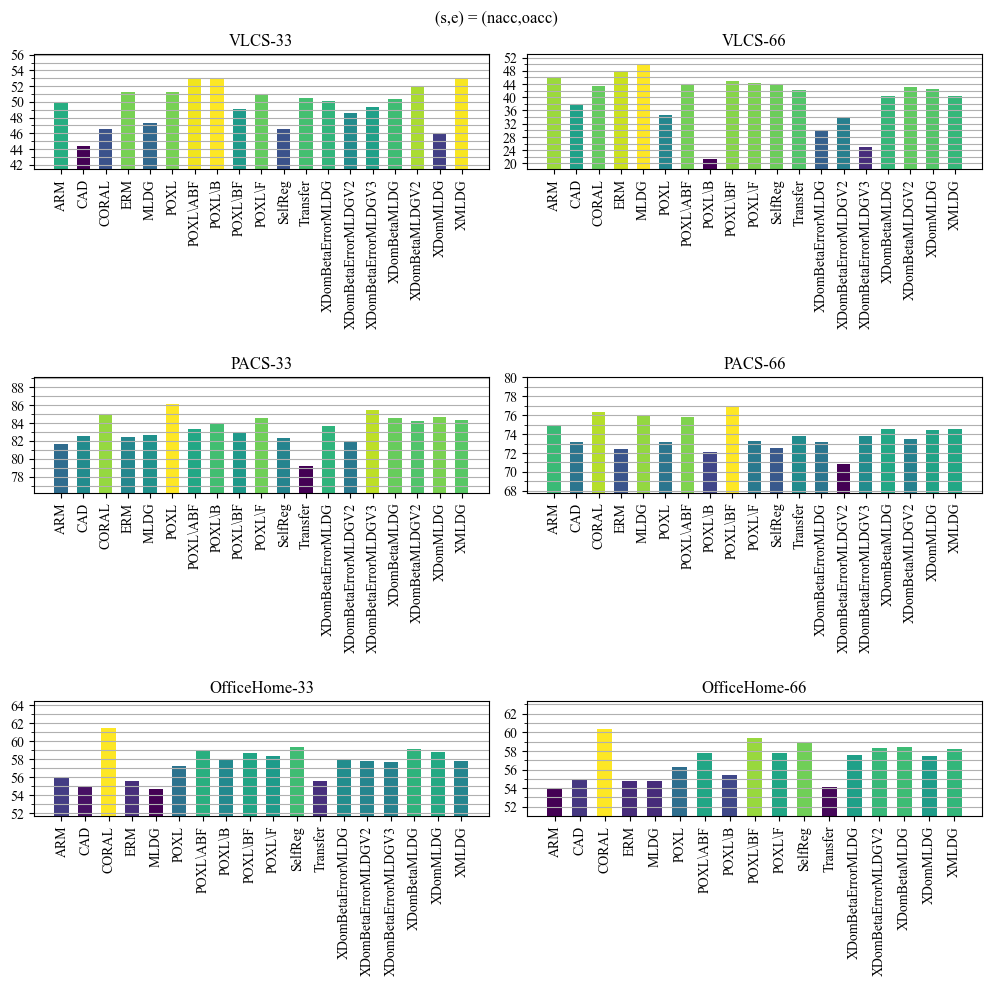

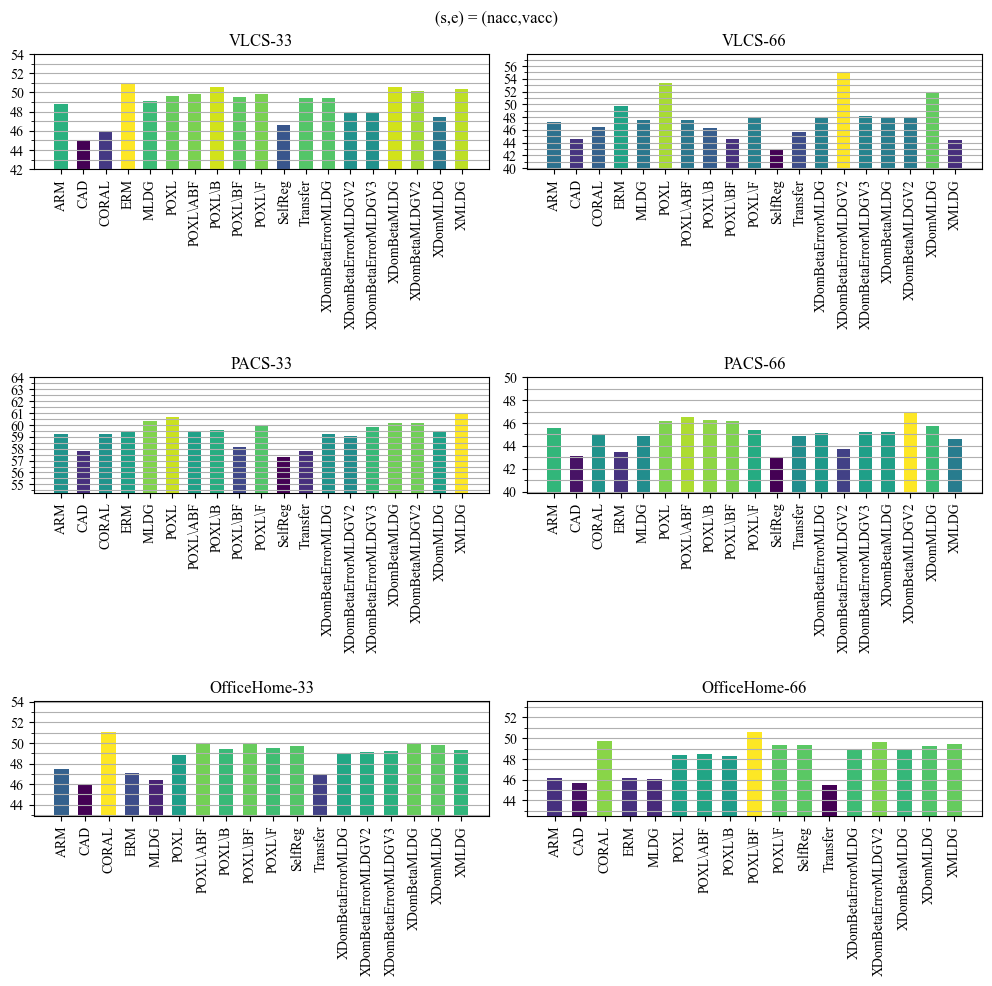

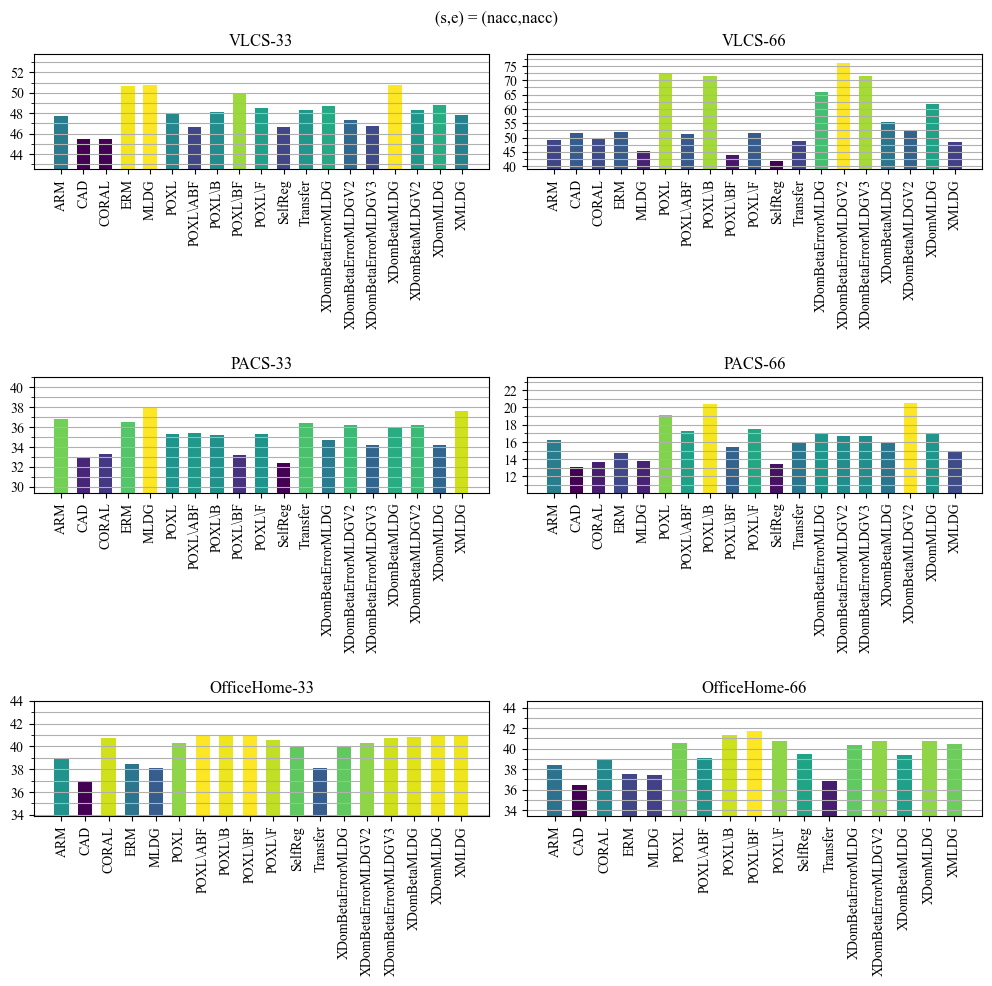

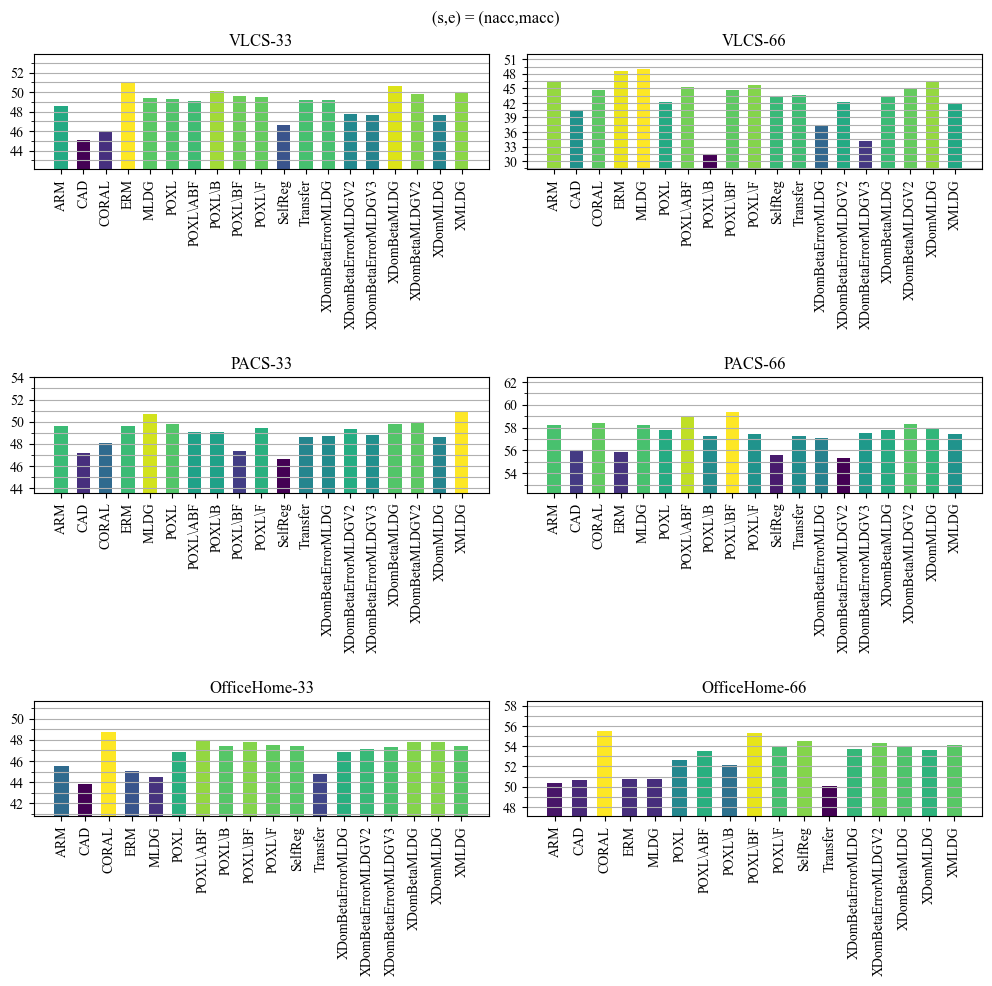

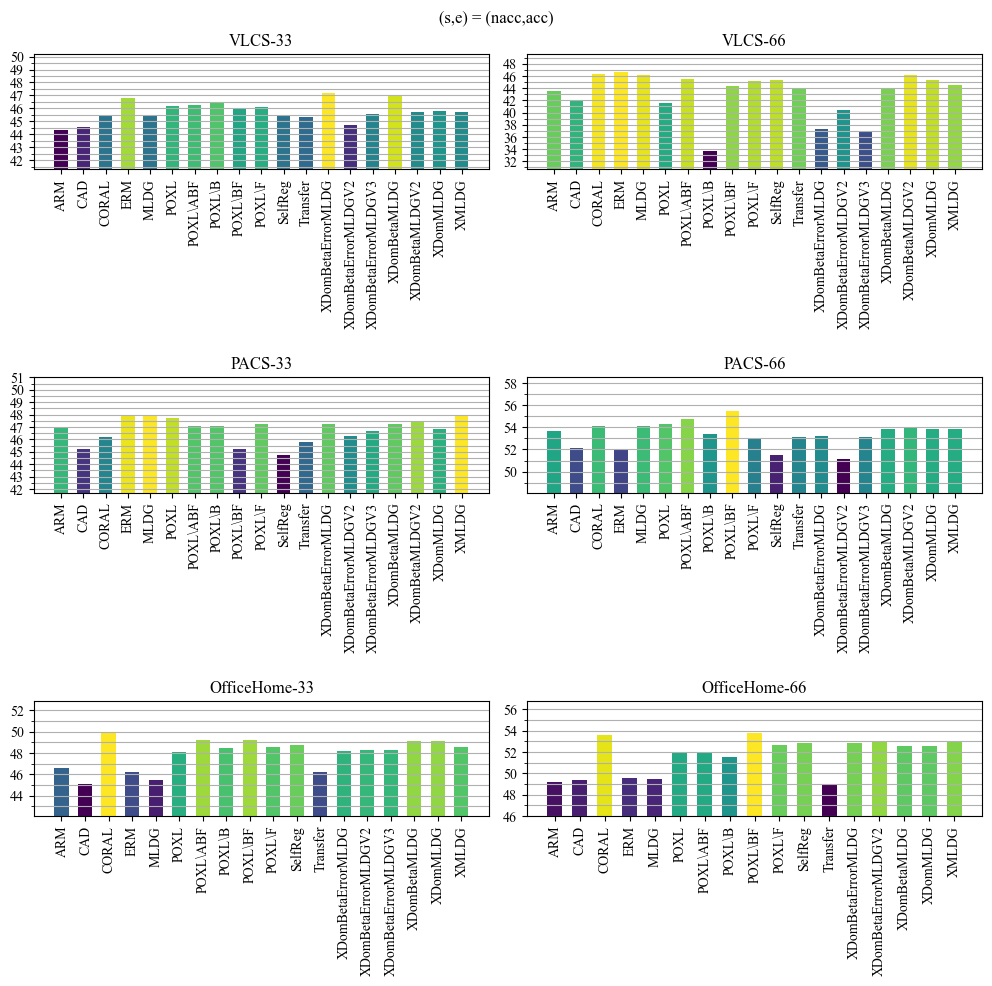

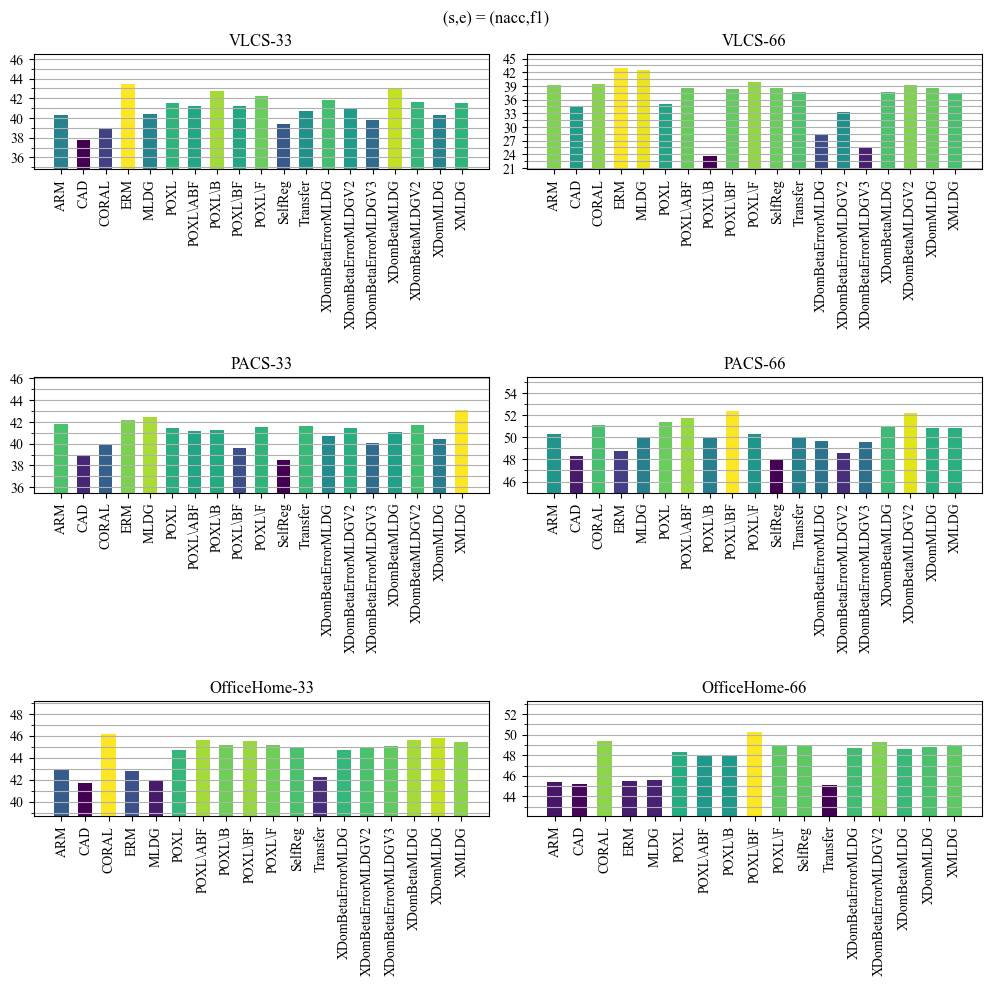

In [13]:
# remove non-baseline
data = df.loc[
    (df['algorithm'] != 'Intra') &
    (df['algorithm'] != 'SupCon') &
    (df['algorithm'] != 'Intra_XDom') &
    (df['algorithm'] != 'XDom') &
    (df['algorithm'] != 'XDomError') &
    (df['algorithm'] != 'XDomBatch') 
]

overlap_list = ['33', '66']
dataset_list = list(df["dataset"].unique())
# dataset_list = ['VLCS']
sl = list(data["selection_metric"].unique())
el = list(data["evaluation_metric"].unique())
sl_el = itertools.product(sl, el)
for s, e in sl_el:
    #if e != s: continue
    if s != 'nacc': continue
    #if e not in  ['nacc', 'vacc', 'macc']: continue
    # if e != 'f1' or s != 'f1': continue
    plot_results(data, s, e, overlap_list, dataset_list)

## Plot the relationship between "nacc" and "oacc"
- Could average across: datasets, overlaps, selection_metrics
    - Across datasets would be the most beneficial and easiest to justify
- Purpose of this plot is display the relationship between non-overlapping and overlapping class accuracies for different methods
- With `selec_metric='nacc'` across all datasets (even excluding VLCS anomally) XDom best accuracy and XDomError best non-overlapping accuracy
- Set the ylim and xlim with the zoom in plot to show the performance discrepancy
- Show the accuracy color gradient in the plot
- Use a zoomed in subplot for the results

# Global Average

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x14fe07850>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x16b873d90>)

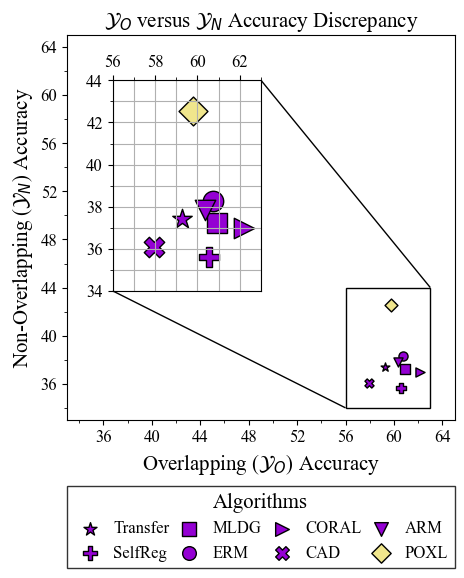

In [29]:
from results import plot_global_dataset, AXIS_LABELS
import math
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

dataset_list = list(df['dataset'].unique())
x='oacc'
y='nacc'
selec_metric='nacc'
num_major_ticks = 7
offset = 2

fig, ax = plt.subplots(figsize=(5,5))

data = plot_global_dataset(df=df, ax=ax, selec_metric=selec_metric, x=x, y=y)

# AXIS LABELS
# ax.set_title(f"{dataset}-{selec_metric}")
# ax.set_title(f"")
# ax.grid(axis="both", which="both")
# SET EQUAL AXIS RANGE/VALUES
x_min = math.floor(min(data[x])) - offset
x_max = math.ceil(max(data[x])) + offset
y_min = math.floor(min(data[y])) - offset
y_max = math.ceil(max(data[y])) + offset

ax_min = y_min = x_min = min(y_min, x_min)
ax_max = y_max = x_max = max(y_max, x_max)
ax_steps = (ax_max - ax_min) / num_major_ticks

ax.set_xlim(ax_min, ax_max)
ax.set_ylim(ax_min, ax_max)

ax.set_xticks(np.arange(ax_min, ax_max, ax_steps))
ax.set_yticks(np.arange(ax_min, ax_max, ax_steps))

ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))

ax.get_yaxis().set_major_locator(MaxNLocator(integer=True))
ax.get_xaxis().set_major_locator(MaxNLocator(integer=True))
ax.tick_params(axis='both', which='major', labelsize=12)

# MIRROR LINE
# ax.plot([ax_min + offset, ax_max - offset], [ax_min + offset, ax_max - offset], "k--", linewidth=1)

# LABELS
ax.set_ylabel(AXIS_LABELS[y], fontsize=15)
ax.set_xlabel(AXIS_LABELS[x], fontsize=15)
ax.set_title("$\mathcal{Y}_O$ versus $\mathcal{Y}_N$ Accuracy Discrepancy", fontsize=15)
# LEGEND
legend = ax.legend(
    #loc='center left', 
    loc='upper center',
    bbox_to_anchor=(0.5,-0.15),
    ncols=4,
    columnspacing=0.2,
    #bbox_to_anchor=(1, 0.5), 
    title="Algorithms", 
    markerscale=1.5, 
    fontsize=12,
    title_fontsize=15,
    fancybox=False,
    edgecolor='black',
    handletextpad=0.4
)
#plt.setp(legend.get_title(),fontsize=15)

# ZOOM PLOT
axins = zoomed_inset_axes(
    ax, 1.75, loc='upper left', bbox_to_anchor=(0.1,0.9),
                   bbox_transform=ax.transAxes)

for index, row in data.iterrows():
    if "POXL" in row['algorithm']:
        color = "khaki"
    else:
        color = "darkviolet"
    axins.scatter(
        x=row[x],
        y=row[y],
        color=color,
        edgecolor="black",
        #color=my_cmap(rescale(row[color_metric], data[color_metric])),
        label=row['algorithm'],
        marker=row['marker'],
        s=mpl.rcParams['lines.markersize'] ** 3
    )
axins.set_xlim(56, 63)
axins.set_ylim(34, 44)
# axins.axes.get_xaxis().set_ticklabels([])
# axins.axes.get_yaxis().set_ticklabels([])
axins.grid(axis="both", which="both")


# AXIS LABELS
# ax.set_title(f"{dataset}-{selec_metric}")
# ax.set_title(f"")
# ax.grid(axis="both", which="both")
# # SET EQUAL AXIS RANGE/VALUES
# x_min = math.floor(min(data[x])) - offset
# x_max = math.ceil(max(data[x])) + offset
# y_min = math.floor(min(data[y])) - offset
# y_max = math.ceil(max(data[y])) + offset

# ax_min = y_min = x_min = min(y_min, x_min)
# ax_max = y_max = x_max = max(y_max, x_max)
# ax_steps = (ax_max - ax_min) / num_major_ticks

# axins.set_xticks(np.arange(ax_min, ax_max, ax_steps))
# axins.set_yticks(np.arange(ax_min, ax_max, ax_steps))

axins.yaxis.set_minor_locator(AutoMinorLocator(2))
axins.xaxis.set_minor_locator(AutoMinorLocator(2))

axins.get_yaxis().set_major_locator(MaxNLocator(integer=True, nbins=5))
axins.get_xaxis().set_major_locator(MaxNLocator(integer=True, nbins=5))

axins.xaxis.set_tick_params(labeltop=True)
axins.xaxis.set_tick_params(labelbottom=False)
axins.xaxis.tick_top()
axins.tick_params(axis='both', which='major', labelsize=12)

mark_inset(ax, axins, loc1=1, loc2=3, lw=1, fc="none", ec="black")

## Create a scatter plot for each dataset
- Create a scatter plot for each dataset that averagers performance across multiple overlaps
- Also visualizes the effect of different selection metrics

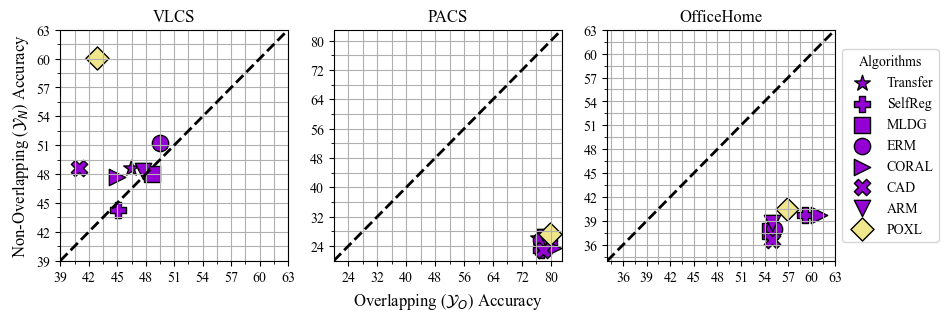

In [15]:
from results import plot_dataset, AXIS_LABELS

dataset_list = list(df['dataset'].unique())
x='oacc'
y='nacc'
color_metric='acc'

for selec_metric in ['nacc']:
    fig, ax = plt.subplots(
        nrows=1, ncols=len(dataset_list), figsize=(10,3), sharey=False)

    for i, dataset in enumerate(dataset_list):
        last_ax = plot_dataset(
            df=df, 
            ax=ax[i], 
            selec_metric=selec_metric,
            dataset=dataset,
            x=x,
            y=y,
            color_metric=color_metric)

    # LABELS
    ax[0].set_ylabel(AXIS_LABELS[y], fontsize=12)
    ax[1].set_xlabel(AXIS_LABELS[x], fontsize=12)
    # LEGEND
    ax[-1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Algorithms")

# # CORRESPONDING VALIDATION RESULTS
# for selec_metric in ['nacc']:
#     fig, ax = plt.subplots(
#         nrows=1, ncols=len(dataset_list), figsize=(10,3), sharey=False)

#     for i, dataset in enumerate(dataset_list):
#         last_ax = plot_dataset(
#             df=df_val, 
#             ax=ax[i], 
#             selec_metric=selec_metric,
#             dataset=dataset,
#             x=x,
#             y=y,
#             color_metric=color_metric)

#     # LABELS
#     ax[0].set_ylabel(AXIS_LABELS[y], fontsize=12)
#     ax[1].set_xlabel(AXIS_LABELS[x], fontsize=12)
#     # LEGEND
#     ax[-1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Algorithms")

## Create a scatter plot for each dataset for each overlap
- Also visualizes the effect of different selection metrics
- Our method makes better use of more intra-domain relationships

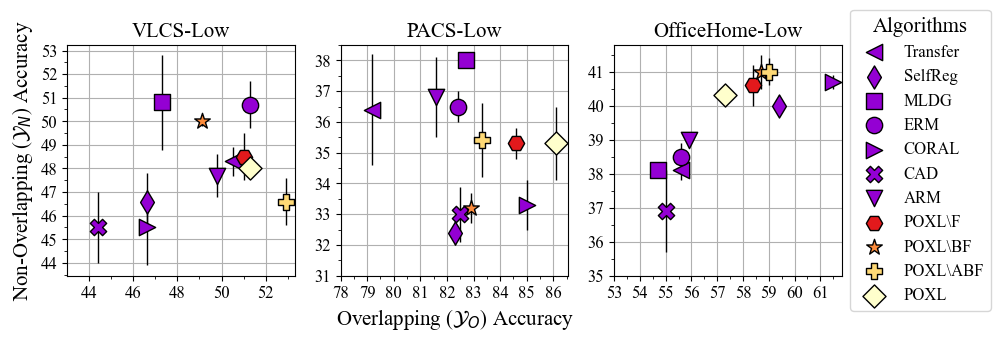

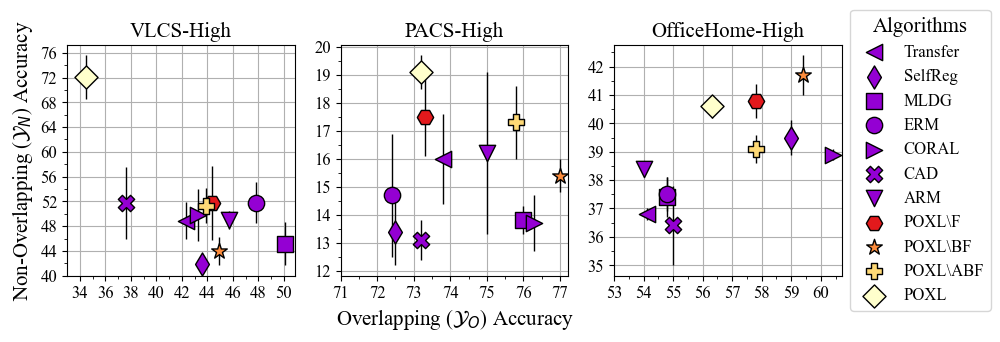

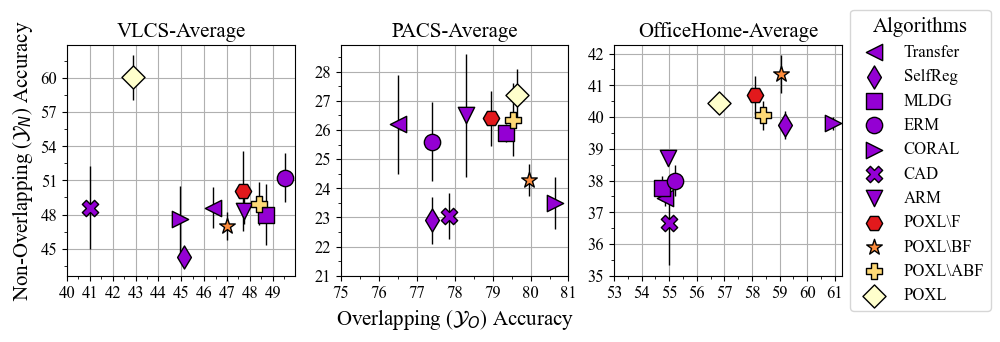

In [21]:
from results import plot_overlap_dataset, AXIS_LABELS

dataset_list = list(df['dataset'].unique())
x='oacc'
y='nacc'
color_metric='acc'
selec_metric='nacc'

# legend = None

for overlap, op_type in zip(['33', '66', ['33', '66']], ["Low", "High", "Average"]):
    fig, axes = plt.subplots(
        nrows=1, ncols=len(dataset_list), figsize=(10,3), sharey=False)

    for i, dataset in enumerate(dataset_list):
        ax = axes[i]
        data = plot_overlap_dataset(
            df, 
            dataset, 
            ax, 
            selec_metric=selec_metric,
            x=x,
            y=y,
            color_metric=color_metric,
            overlap=overlap)
        ax.set_title(f"{dataset}-{op_type}", fontsize=15)
        # AXIS LABELS
        # ax.set_title(f"{dataset}")
        ax.grid(axis="both", which="major")
        # AXIS RANGE/VALUES
        # AXIS X
        x_min = math.floor(min(data[x])) - 1
        x_max = math.ceil(max(data[x])) + 1
        x_steps = (x_max - x_min) / num_major_ticks
        #ax.set_xlim(x_min, x_max)
        ax.set_xticks(np.arange(x_min, x_max, x_steps))
        # AXIS Y
        y_min = math.floor(min(data[y])) - 1
        y_max = math.ceil(max(data[y])) + 1
        y_steps = (y_max - y_min) / num_major_ticks
        #ax.set_ylim(y_min, y_max)
        ax.set_yticks(np.arange(y_min, y_max, y_steps))

        ax.yaxis.set_minor_locator(AutoMinorLocator(2))
        ax.xaxis.set_minor_locator(AutoMinorLocator(2))

        ax.get_yaxis().set_major_locator(MaxNLocator(integer=True))
        ax.get_xaxis().set_major_locator(MaxNLocator(integer=True))
        
        # We change the fontsize of minor ticks label 
        ax.tick_params(axis='both', which='major', labelsize=12)

    axes[0].set_ylabel(y)
    # LEGEND
    legend = axes[-1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Algorithms", fontsize=12)
    plt.setp(legend.get_title(),fontsize=15)

    axes[1].set_xlabel(AXIS_LABELS[x], fontsize=15)
    axes[0].set_ylabel(AXIS_LABELS[y], fontsize=15)
    #fig.tight_layout(pad=1.0, h_pad=2.0)
    #fig.tight_layout()
    #fig.suptitle(op_type)
#     legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Algorithms", markerscale=1.5, fontsize=12)
#     plt.setp(legend.get_title(),fontsize=15)

# LEGEND


# # CORRESPONDING VALIDATION VALUES
# for overlap in ['33', '66', ['33', '66']]:
#     fig, ax = plt.subplots(
#         nrows=1, ncols=len(dataset_list), figsize=(10,3), sharey=False)

#     for i, dataset in enumerate(dataset_list):
#         last_ax = plot_overlap_dataset(
#             df_val, 
#             dataset, 
#             ax[i], 
#             selec_metric=selec_metric,
#             x=x,
#             y=y,
#             color_metric=color_metric,
#             overlap=overlap)

#     ax[0].set_ylabel(y)
#     # LEGEND
#     ax[-1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Algorithms")
#     ax[1].set_xlabel(AXIS_LABELS[x], fontsize=12)
#     ax[0].set_ylabel(AXIS_LABELS[y], fontsize=12)


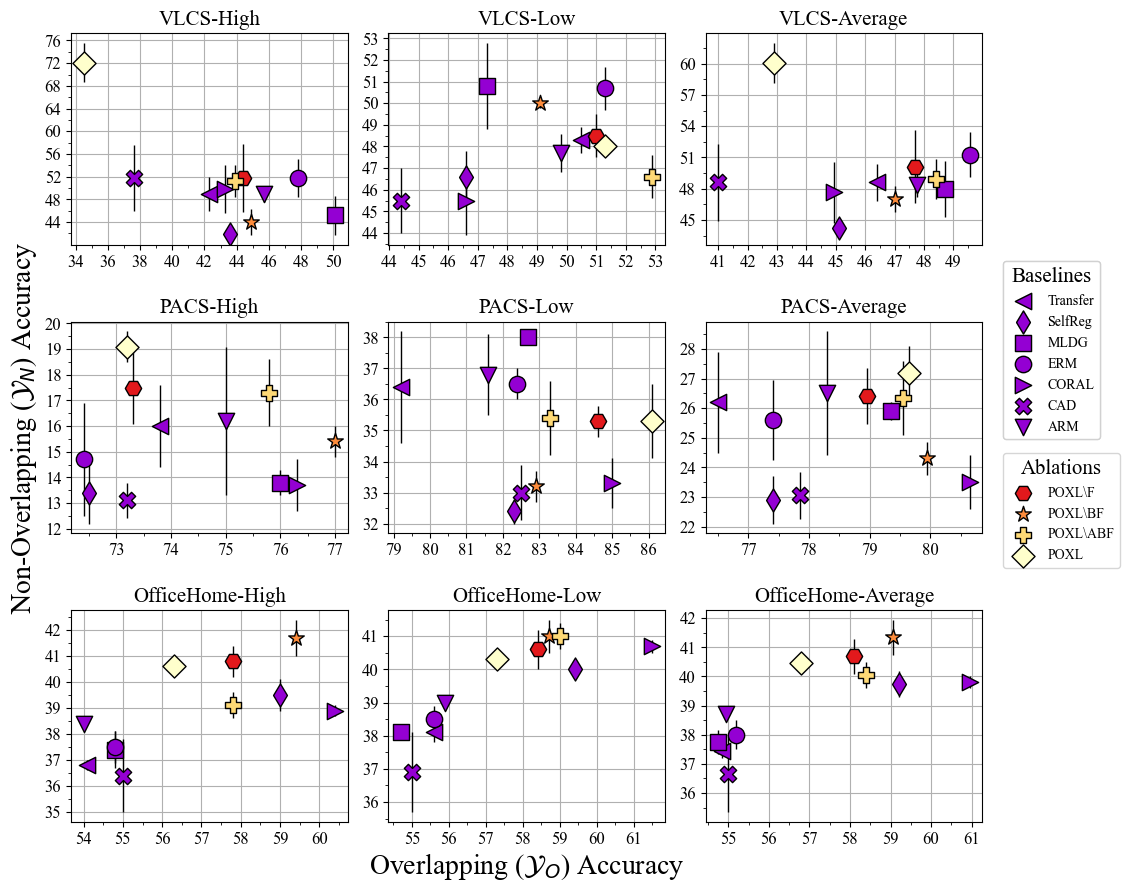

In [20]:
from results import plot_overlap_dataset, AXIS_LABELS, BASELINES

dataset_list = list(df['dataset'].unique())
x='oacc'
y='nacc'
color_metric='acc'
selec_metric='nacc'

op_list = ['66', '33', ['33', '66']]
title_list = ['High', 'Low', 'Average']

fig, axes = plt.subplots(nrows=len(dataset_list), ncols=len(op_list), figsize=(10,9), sharey=False)
for i, (overlap, op_type) in enumerate(zip(op_list, title_list)):
    for j, dataset in enumerate(dataset_list):
        ax = axes[j,i]
        data = plot_overlap_dataset(
            df, 
            dataset, 
            ax, 
            selec_metric=selec_metric,
            x=x,
            y=y,
            color_metric=color_metric,
            overlap=overlap)
        ax.set_title(f"{dataset}-{op_type}", fontsize=15)
        # AXIS LABELS
        # ax.set_title(f"{dataset}")
        ax.grid(axis="both", which="major")

        ax.yaxis.set_minor_locator(AutoMinorLocator(2))
        ax.xaxis.set_minor_locator(AutoMinorLocator(2))

        ax.get_yaxis().set_major_locator(MaxNLocator(integer=True))
        ax.get_xaxis().set_major_locator(MaxNLocator(integer=True))
        
        # We change the fontsize of minor ticks label 
        ax.tick_params(axis='both', which='major', labelsize=12)

# AXIS LABELS
axes[1][0].set_ylabel(AXIS_LABELS[y], fontsize=20)
axes[len(op_list)-1][1].set_xlabel(AXIS_LABELS[x], fontsize=20)

# LEGEND
handles, labels = axes[0,0].get_legend_handles_labels()
# get baselines
baselines = ([], [])
ablations = ([], [])
for handle, label in zip(handles, labels):
    if label in BASELINES:
        baselines[0].append(handle)
        baselines[1].append(label)
    else:
        ablations[0].append(handle)
        ablations[1].append(label)

# Create a baseline class legend
baseline_legend = fig.legend(
    title="Baselines",
    handles=baselines[0], 
    labels=baselines[1], 
    #markerscale=5,
    loc='lower left', 
    #ncols=len(noc_legend[0]),
    bbox_to_anchor=(1,0.5),
    #columnspacing=0.2,
    title_fontsize=15,
    #bbox_to_anchor=(1,0.65),
    )
# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(baseline_legend)

# Create the ablation class legend

legend = fig.legend(
    title="Ablations",
    handles=ablations[0], 
    labels=ablations[1], 
    #ncols=8, 
    loc='upper left', 
    bbox_to_anchor=(1, 0.5), 
    #fontsize=12, 
    #columnspacing=0.2,
    title_fontsize=15,
)
# legend = axes[0,0].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Algorithms", fontsize=12)
# plt.setp(legend.get_title(),fontsize=15)

fig.tight_layout(pad=1.0, h_pad=2.0)

# Ablation Plots

Text(0, 0.5, 'Non-Overlapping ($\\mathcal{Y}_{N}$) Accuracy')

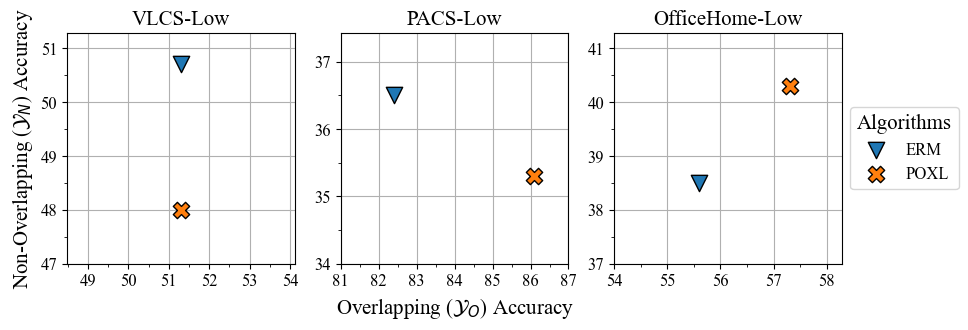

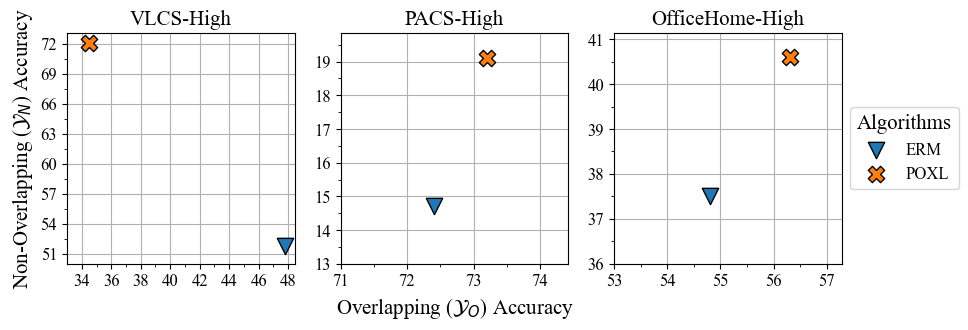

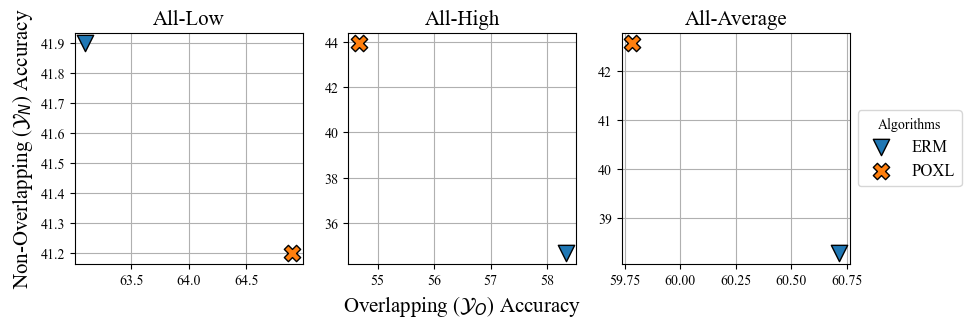

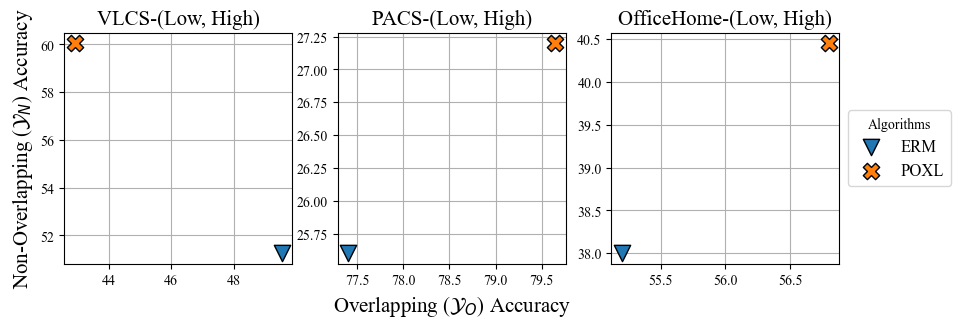

In [18]:
from results import plot_ablation, AXIS_LABELS, ABLATION

dataset_list = list(df['dataset'].unique())
x='oacc'
y='nacc'
color_metric='macc'
selec_metric='nacc'

################ ACROSS ALL DATASETS AND OVERLAP SETTINGS

for overlap, op_type in zip(['33', '66'], ["Low", "High"]):
    fig, axes = plt.subplots(
        nrows=1, ncols=len(dataset_list), figsize=(10,3), sharey=False)

    for i, dataset in enumerate(dataset_list):
        ax = axes[i]
        data = plot_ablation(
            df=df, 
            dataset=dataset,
            algorithm=ABLATION,
            ax=ax, 
            selec_metric=selec_metric,
            x=x,
            y=y,
            color_metric=color_metric,
            overlap=overlap)
        ax.set_title(f"{dataset}-{op_type}", fontsize=15)
        # AXIS LABELS
        # ax.set_title(f"{dataset}")
        ax.grid(axis="both", which="major")
        # AXIS RANGE/VALUES
        # AXIS X
        x_min = math.floor(min(data[x])) - 1
        x_max = math.ceil(max(data[x])) + 1
        x_steps = (x_max - x_min) / num_major_ticks
        #ax.set_xlim(x_min, x_max)
        ax.set_xticks(np.arange(x_min, x_max, x_steps))
        # AXIS Y
        y_min = math.floor(min(data[y])) - 1
        y_max = math.ceil(max(data[y])) + 1
        y_steps = (y_max - y_min) / num_major_ticks
        #ax.set_ylim(y_min, y_max)
        ax.set_yticks(np.arange(y_min, y_max, y_steps))

        ax.yaxis.set_minor_locator(AutoMinorLocator(2))
        ax.xaxis.set_minor_locator(AutoMinorLocator(2))

        ax.get_yaxis().set_major_locator(MaxNLocator(integer=True))
        ax.get_xaxis().set_major_locator(MaxNLocator(integer=True))
        
        # We change the fontsize of minor ticks label 
        ax.tick_params(axis='both', which='major', labelsize=12)

    axes[0].set_ylabel(y)
    # LEGEND
    legend = axes[-1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Algorithms", fontsize=12)
    plt.setp(legend.get_title(),fontsize=15)

    axes[1].set_xlabel(AXIS_LABELS[x], fontsize=15)
    axes[0].set_ylabel(AXIS_LABELS[y], fontsize=15)
    #fig.tight_layout(pad=1.0, h_pad=2.0)
    #fig.tight_layout()
    #fig.suptitle(op_type)
#     legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Algorithms", markerscale=1.5, fontsize=12)
#     plt.setp(legend.get_title(),fontsize=15)

# LEGEND

################ AVERAGED ACROSS DATASETS

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
for i, (overlap, op_type) in enumerate(zip(['33', '66', ['33', '66']], ["Low", "High", "Average"])):
    ax = axes[i]
    data = plot_ablation(
        df=df, 
        dataset=dataset_list,
        algorithm=ABLATION,
        ax=ax, 
        selec_metric=selec_metric,
        x=x,
        y=y,
        color_metric=color_metric,
        overlap=overlap)
    ax.set_title(f"All-{op_type}", fontsize=15)
    ax.grid(axis="both", which="major")
# LEGEND
legend = axes[-1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Algorithms", fontsize=12)
#plt.setp(legend.get_title(),fontsize=15)

# AXIS LABELS
axes[1].set_xlabel(AXIS_LABELS[x], fontsize=15)
axes[0].set_ylabel(AXIS_LABELS[y], fontsize=15)

################ AVERAGED ACROSS OVERLAP SETTINGS

fig, axes = plt.subplots(nrows=1, ncols=len(dataset_list), figsize=(10,3), sharey=False)
for i, dataset in enumerate(dataset_list):
    ax = axes[i]
    data = plot_ablation(
        df=df, 
        dataset=dataset,
        algorithm=ABLATION,
        ax=ax, 
        selec_metric=selec_metric,
        x=x,
        y=y,
        color_metric=color_metric,
        overlap=['33', '66']
    )
    ax.set_title(f"{dataset}-(Low, High)", fontsize=15)
    ax.grid(axis="both", which="major")
    
# LEGEND
legend = axes[-1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Algorithms", fontsize=12)
#plt.setp(legend.get_title(),fontsize=15)

# AXIS LABELS
axes[1].set_xlabel(AXIS_LABELS[x], fontsize=15)
axes[0].set_ylabel(AXIS_LABELS[y], fontsize=15)

# Ablation Plots
### Averaged accross datasets

Text(0, 0.5, 'Non-Overlapping ($\\mathcal{Y}_{N}$) Accuracy')

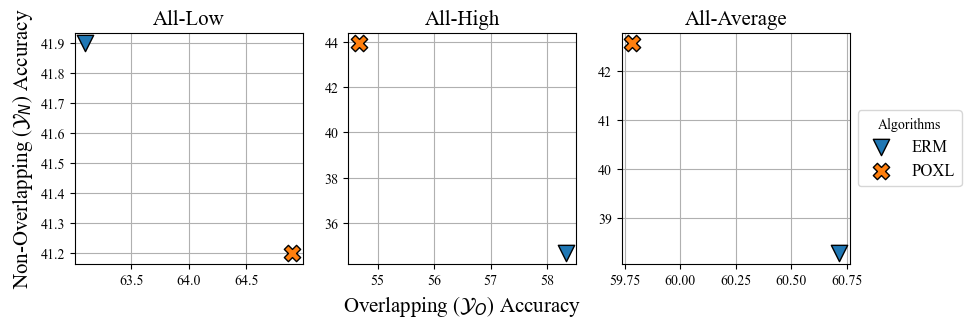

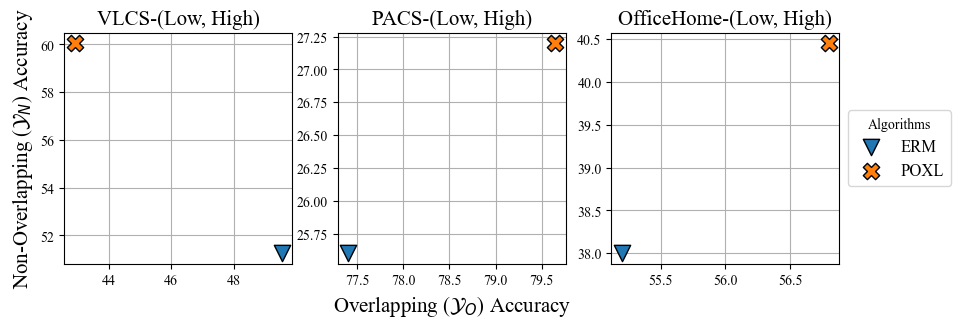

In [19]:
from results import plot_ablation, AXIS_LABELS, ABLATION

dataset_list = list(df['dataset'].unique())
x='oacc'
y='nacc'
color_metric='macc'
selec_metric='nacc'

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
for i, (overlap, op_type) in enumerate(zip(['33', '66', ['33', '66']], ["Low", "High", "Average"])):
    ax = axes[i]
    data = plot_ablation(
        df=df, 
        dataset=dataset_list,
        algorithm=ABLATION,
        ax=ax, 
        selec_metric=selec_metric,
        x=x,
        y=y,
        color_metric=color_metric,
        overlap=overlap)
    ax.set_title(f"All-{op_type}", fontsize=15)
    ax.grid(axis="both", which="major")
# LEGEND
legend = axes[-1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Algorithms", fontsize=12)
#plt.setp(legend.get_title(),fontsize=15)

# AXIS LABELS
axes[1].set_xlabel(AXIS_LABELS[x], fontsize=15)
axes[0].set_ylabel(AXIS_LABELS[y], fontsize=15)

fig, axes = plt.subplots(nrows=1, ncols=len(dataset_list), figsize=(10,3), sharey=False)
for i, dataset in enumerate(dataset_list):
    ax = axes[i]
    data = plot_ablation(
        df=df, 
        dataset=dataset,
        algorithm=ABLATION,
        ax=ax, 
        selec_metric=selec_metric,
        x=x,
        y=y,
        color_metric=color_metric,
        overlap=['33', '66']
    )
    ax.set_title(f"{dataset}-(Low, High)", fontsize=15)
    ax.grid(axis="both", which="major")
    
# LEGEND
legend = axes[-1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Algorithms", fontsize=12)
#plt.setp(legend.get_title(),fontsize=15)

# AXIS LABELS
axes[1].set_xlabel(AXIS_LABELS[x], fontsize=15)
axes[0].set_ylabel(AXIS_LABELS[y], fontsize=15)